<a href="https://colab.research.google.com/github/Jiya-786/Statistics_notes/blob/main/TUT/TUT-4/stats_TUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Statistical concepts and visualization

In [ ]:
# importing req libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
np.random.seed(42)

# set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size']=12

In [ ]:
# mean minimizes sum of squared distance
# median minimizes sum of absolute distance

# 1.2 computing mena and median

#create a simple numerical dataset
data=np.array([2,4,5,7,8,10,12,15,18,20])

# compute mean and median
mean_value=np.mean(data)
median_value=np.median(data)

print(f"Dataset: {data}")
print(f"\nMean: {mean_value:.2f}")
print(f"Median:{median_value:.2f}")


Dataset: [ 2  4  5  7  8 10 12 15 18 20]

Mean: 10.10
Median:9.00


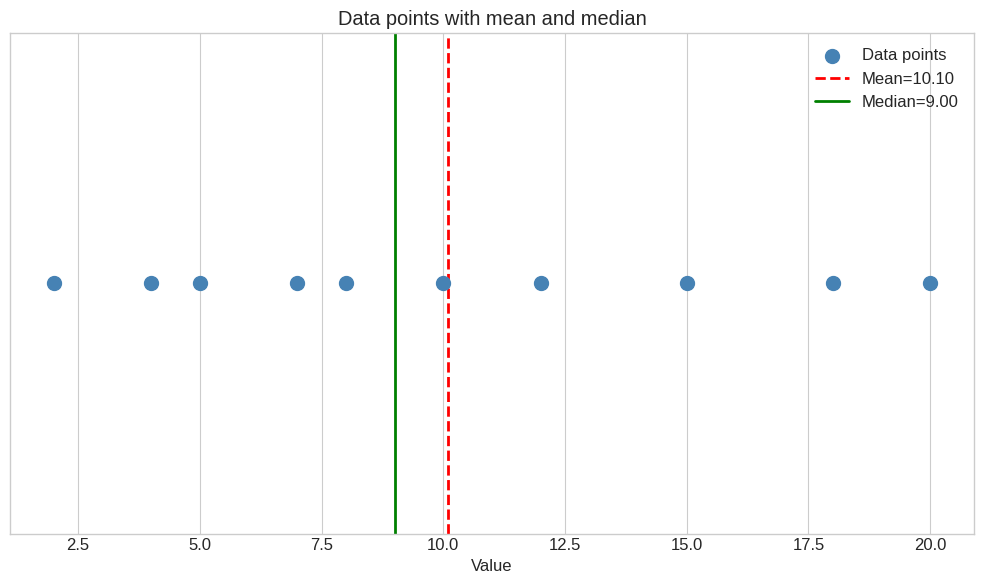

In [ ]:
# visualize the data with mean adn median
plt.figure(figsize=(12,4))

plt.scatter(data,np.zeros_like(data),s=100,c='steelblue',zorder=5,label='Data points')
plt.axvline(mean_value,color='red',linestyle='--',linewidth=2,label=f'Mean={mean_value:.2f}')
plt.axvline(median_value,color='green',linestyle='-',linewidth=2,label=f'Median={median_value:.2f}')

plt.xlabel('Value')
plt.yticks([])
plt.title('Data points with mean and median')
plt.legend()
plt.tight_layout()
plt.show()


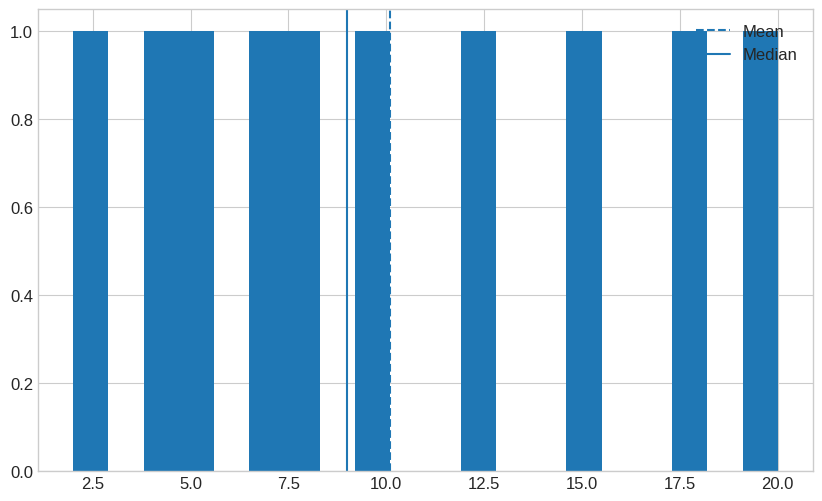

In [ ]:
plt.hist(data, bins=20)
plt.axvline(mean_value, linestyle='--', label='Mean')
plt.axvline(median_value, label='Median')
plt.legend()
plt.show()


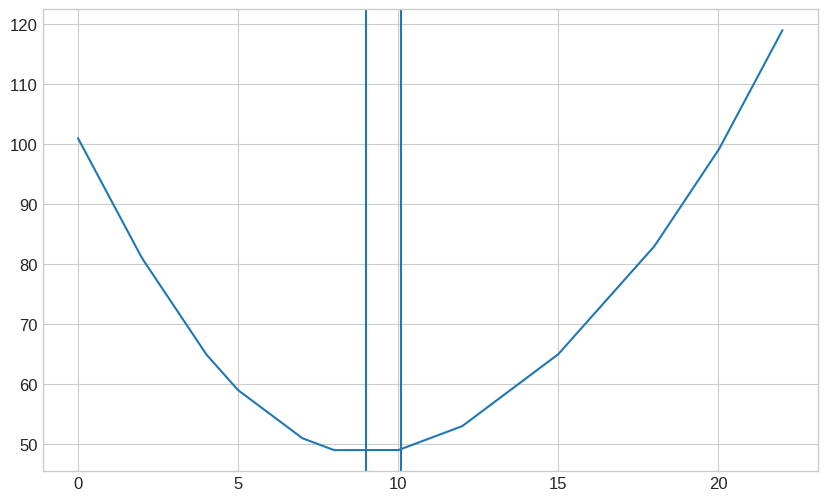

In [ ]:
# define function to compute cumulative absolute distance
def cumulative_absolute_distance(data,center):
  return np.sum(np.abs(data-center))


candidate_centers=np.linspace(min(data)-2,max(data)+2,500)

distances=[cumulative_absolute_distance(data,c) for c in candidate_centers]

# data_point_distances=[cumulative_absolute_distance(data,x) for x in data]

plt.plot(candidate_centers,distances)
plt.axvline(median_value)
plt.axvline(mean_value)


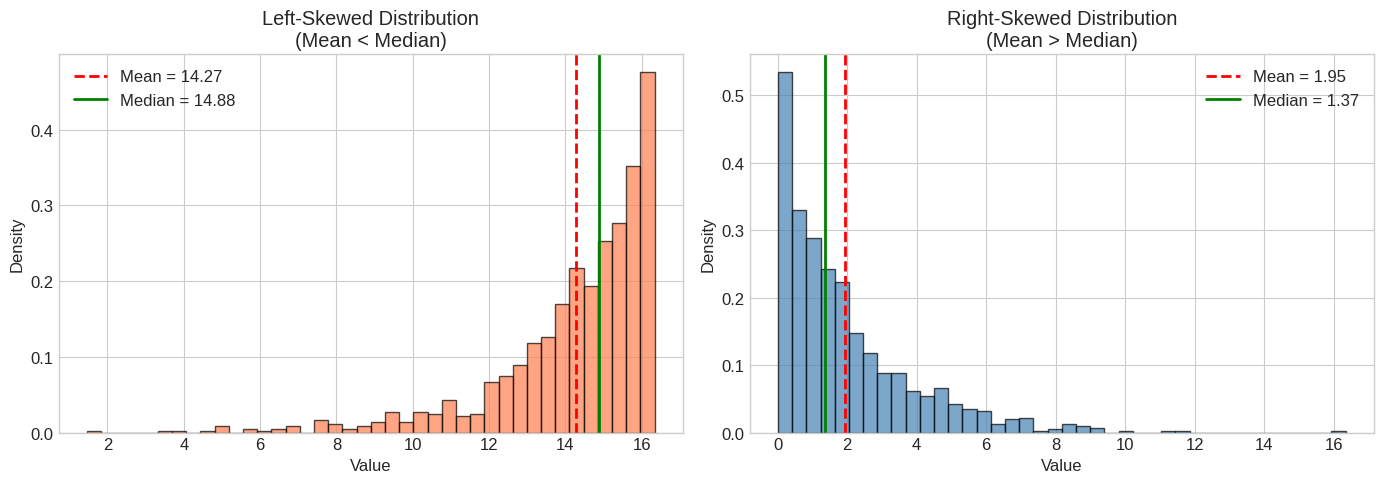


OBSERVATIONS:

Left-Skewed Distribution:
  Mean = 14.2747
  Median = 14.8822
  Mean - Median = -0.6076 (NEGATIVE → Mean < Median)

Right-Skewed Distribution:
  Mean = 1.9450
  Median = 1.3736
  Mean - Median = 0.5714 (POSITIVE → Mean > Median)


In [ ]:
# Generate skewed distributions
np.random.seed(42)

# Right-skewed: Exponential distribution
right_skewed = np.random.exponential(scale=2, size=1000)

# Left-skewed: Reflected exponential (subtract from max)
left_skewed = np.max(right_skewed) - np.random.exponential(scale=2, size=1000)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left-skewed distribution
ax1 = axes[0]
ax1.hist(left_skewed, bins=40, density=True, alpha=0.7, color='coral', edgecolor='black')
mean_left = np.mean(left_skewed)
median_left = np.median(left_skewed)
ax1.axvline(mean_left, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_left:.2f}')
ax1.axvline(median_left, color='green', linestyle='-', linewidth=2, label=f'Median = {median_left:.2f}')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.set_title('Left-Skewed Distribution\n(Mean < Median)')
ax1.legend()

# Right-skewed distribution
ax2 = axes[1]
ax2.hist(right_skewed, bins=40, density=True, alpha=0.7, color='steelblue', edgecolor='black')
mean_right = np.mean(right_skewed)
median_right = np.median(right_skewed)
ax2.axvline(mean_right, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_right:.2f}')
ax2.axvline(median_right, color='green', linestyle='-', linewidth=2, label=f'Median = {median_right:.2f}')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Right-Skewed Distribution\n(Mean > Median)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OBSERVATIONS:")
print("="*60)
print(f"\nLeft-Skewed Distribution:")
print(f"  Mean = {mean_left:.4f}")
print(f"  Median = {median_left:.4f}")
print(f"  Mean - Median = {mean_left - median_left:.4f} (NEGATIVE → Mean < Median)")
print(f"\nRight-Skewed Distribution:")
print(f"  Mean = {mean_right:.4f}")
print(f"  Median = {median_right:.4f}")
print(f"  Mean - Median = {mean_right - median_right:.4f} (POSITIVE → Mean > Median)")

In [ ]:
# Generate continuous random variable data (Normal distribution)
np.random.seed(42)
continuous_data = np.random.normal(loc=50, scale=10, size=1000)

print(f"Generated {len(continuous_data)} samples from Normal(μ=50, σ=10)")
print(f"Sample mean: {np.mean(continuous_data):.2f}")
print(f"Sample std: {np.std(continuous_data):.2f}")



Generated 1000 samples from Normal(μ=50, σ=10)
Sample mean: 50.19
Sample std: 9.79


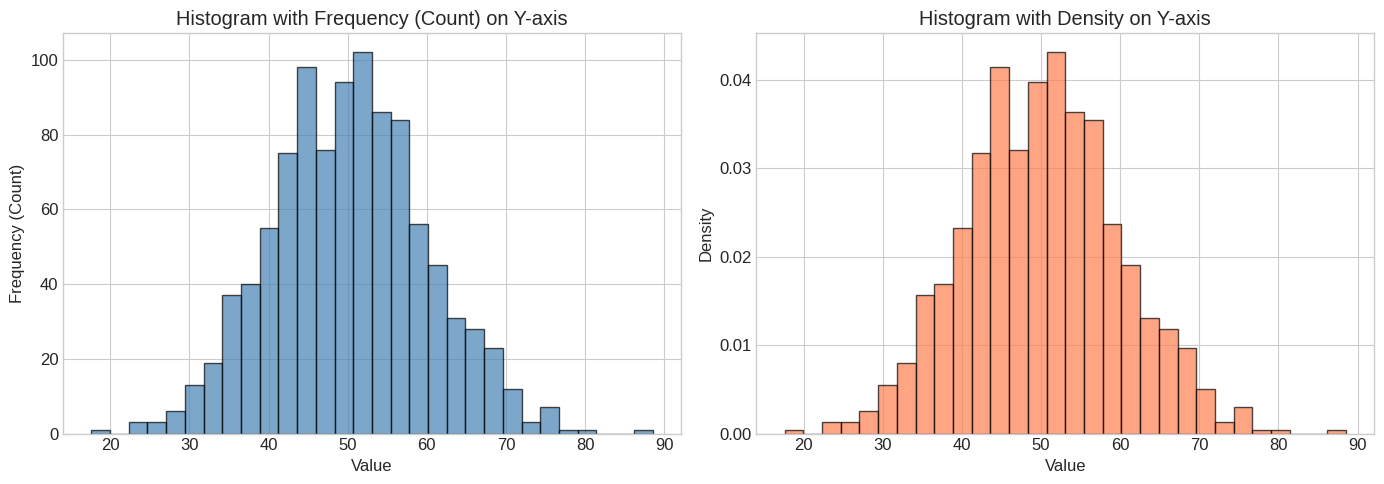

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Frequency histogram
axes[0].hist(continuous_data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency (Count)')
axes[0].set_title('Histogram with Frequency (Count) on Y-axis')

# Density histogram
axes[1].hist(continuous_data, bins=30, density=True, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('Histogram with Density on Y-axis')

plt.tight_layout()
plt.show()

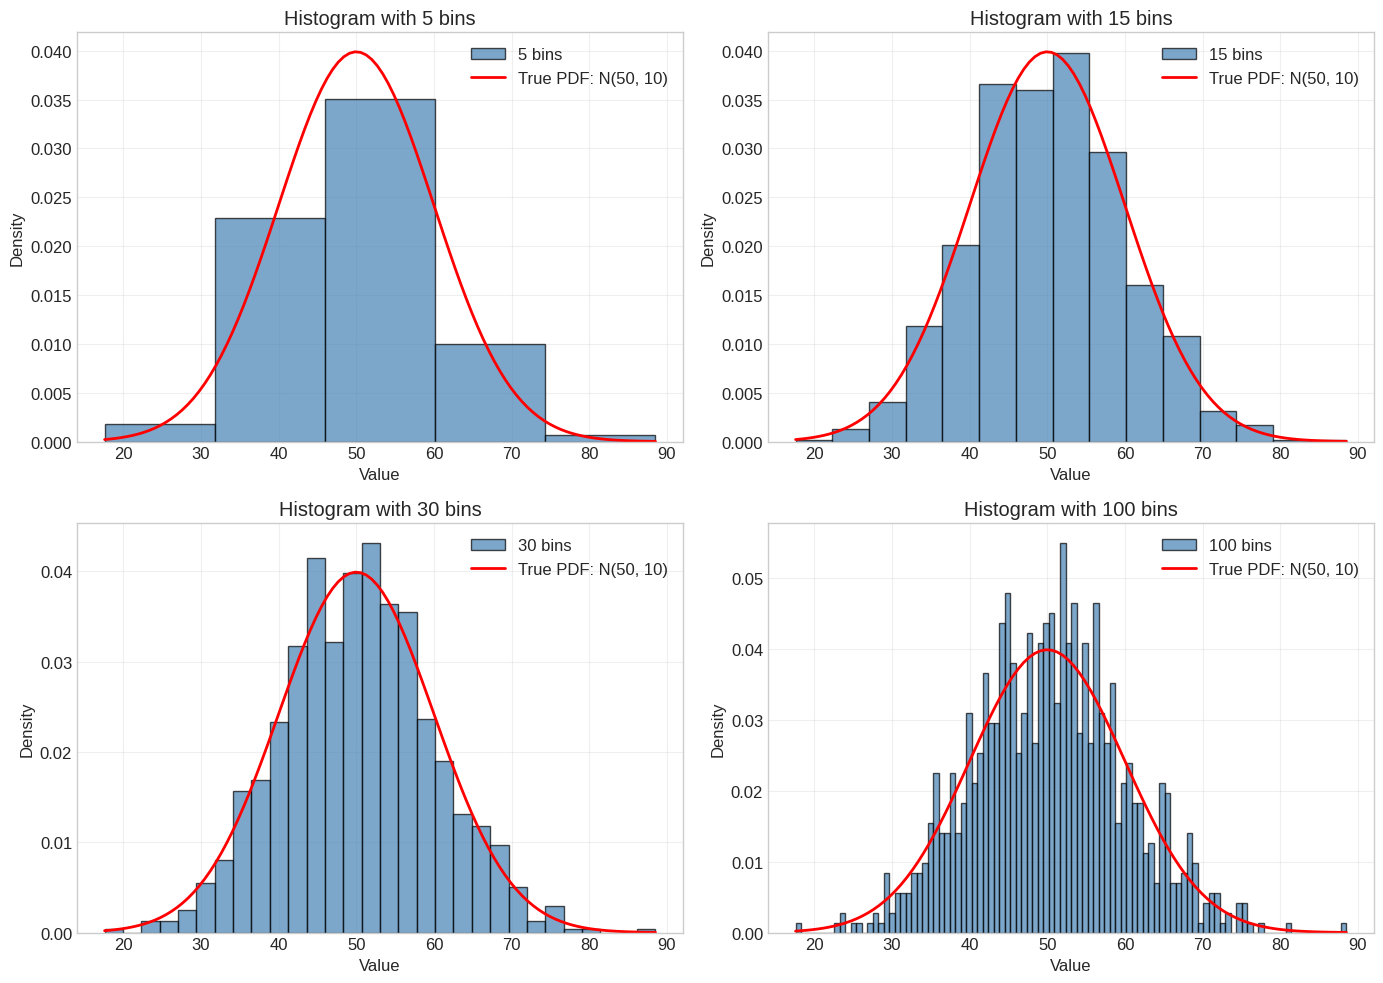

In [ ]:
# Experiment with different bin widths
bin_counts = [5, 15, 30, 100]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n_bins in zip(axes, bin_counts):
    ax.hist(continuous_data, bins=n_bins, density=True, color='steelblue',
            edgecolor='black', alpha=0.7, label=f'{n_bins} bins')

    # Overlay true PDF
    x = np.linspace(min(continuous_data), max(continuous_data), 100)
    true_pdf = stats.norm.pdf(x, loc=50, scale=10)
    ax.plot(x, true_pdf, 'r-', linewidth=2, label='True PDF: N(50, 10)')

    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Histogram with {n_bins} bins')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

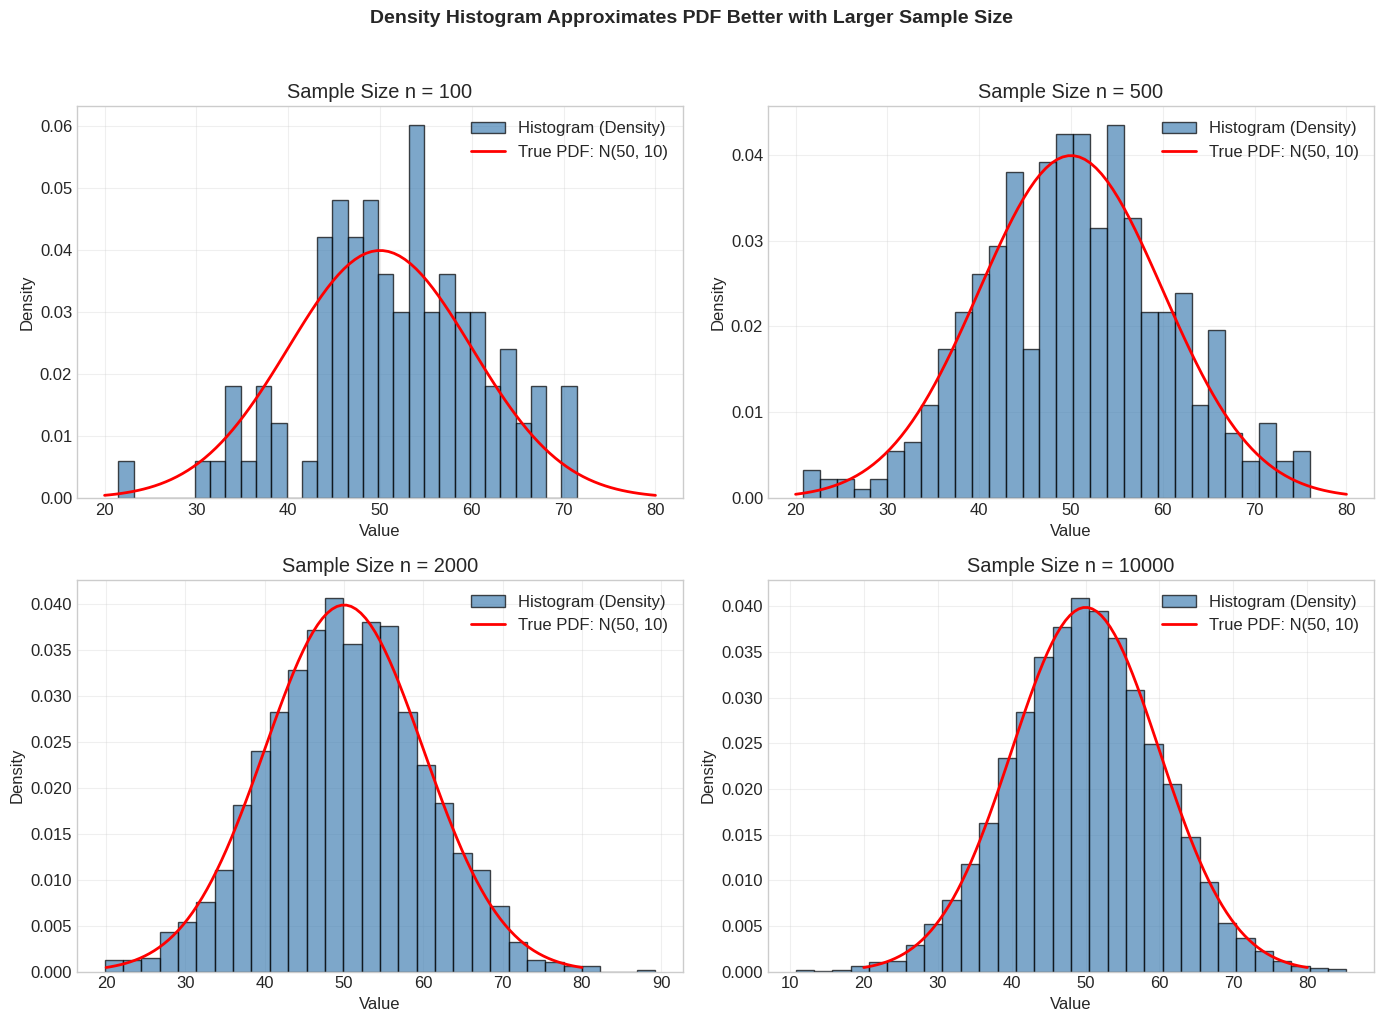

In [ ]:
# Show how density histogram approximates PDF with increasing sample size
sample_sizes = [100, 500, 2000, 10000]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n in zip(axes, sample_sizes):
    # Generate samples
    samples = np.random.normal(loc=50, scale=10, size=n)

    # Plot histogram
    ax.hist(samples, bins=30, density=True, color='steelblue',
            edgecolor='black', alpha=0.7, label='Histogram (Density)')

    # Overlay true PDF
    x = np.linspace(20, 80, 100)
    true_pdf = stats.norm.pdf(x, loc=50, scale=10)
    ax.plot(x, true_pdf, 'r-', linewidth=2, label='True PDF: N(50, 10)')

    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Sample Size n = {n}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Density Histogram Approximates PDF Better with Larger Sample Size',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Create a large "population" - mixture of two normal distributions
np.random.seed(42)
population_size = 100000

# Bimodal population: mixture of two normals
population = np.concatenate([
    np.random.normal(loc=30, scale=5, size=population_size // 2),
    np.random.normal(loc=60, scale=8, size=population_size // 2)
])

print(f"Population size: {len(population)}")
print(f"Population mean: {np.mean(population):.2f}")
print(f"Population std: {np.std(population):.2f}")

Population size: 100000
Population mean: 45.01
Population std: 16.43


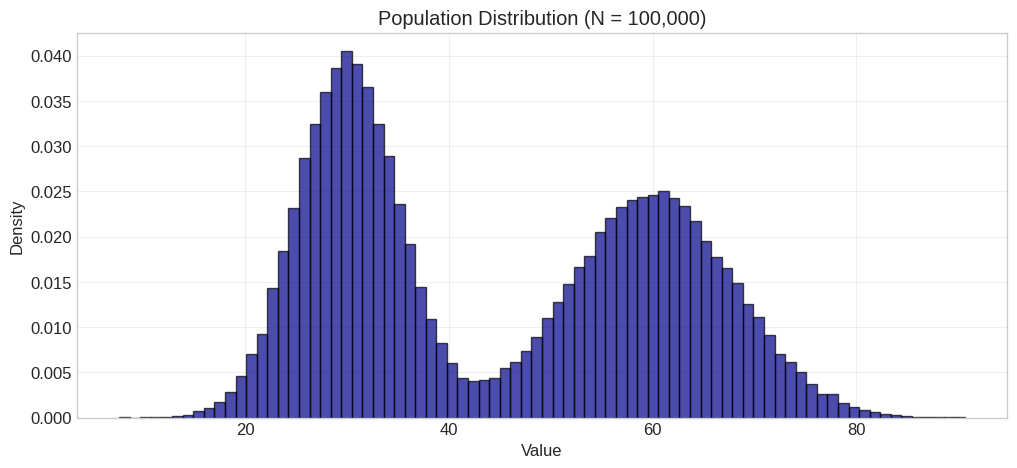

In [ ]:
# Plot population distribution
plt.figure(figsize=(12, 5))
plt.hist(population, bins=80, density=True, color='darkblue',
         edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Population Distribution (N = {len(population):,})')
plt.grid(True, alpha=0.3)
plt.show()

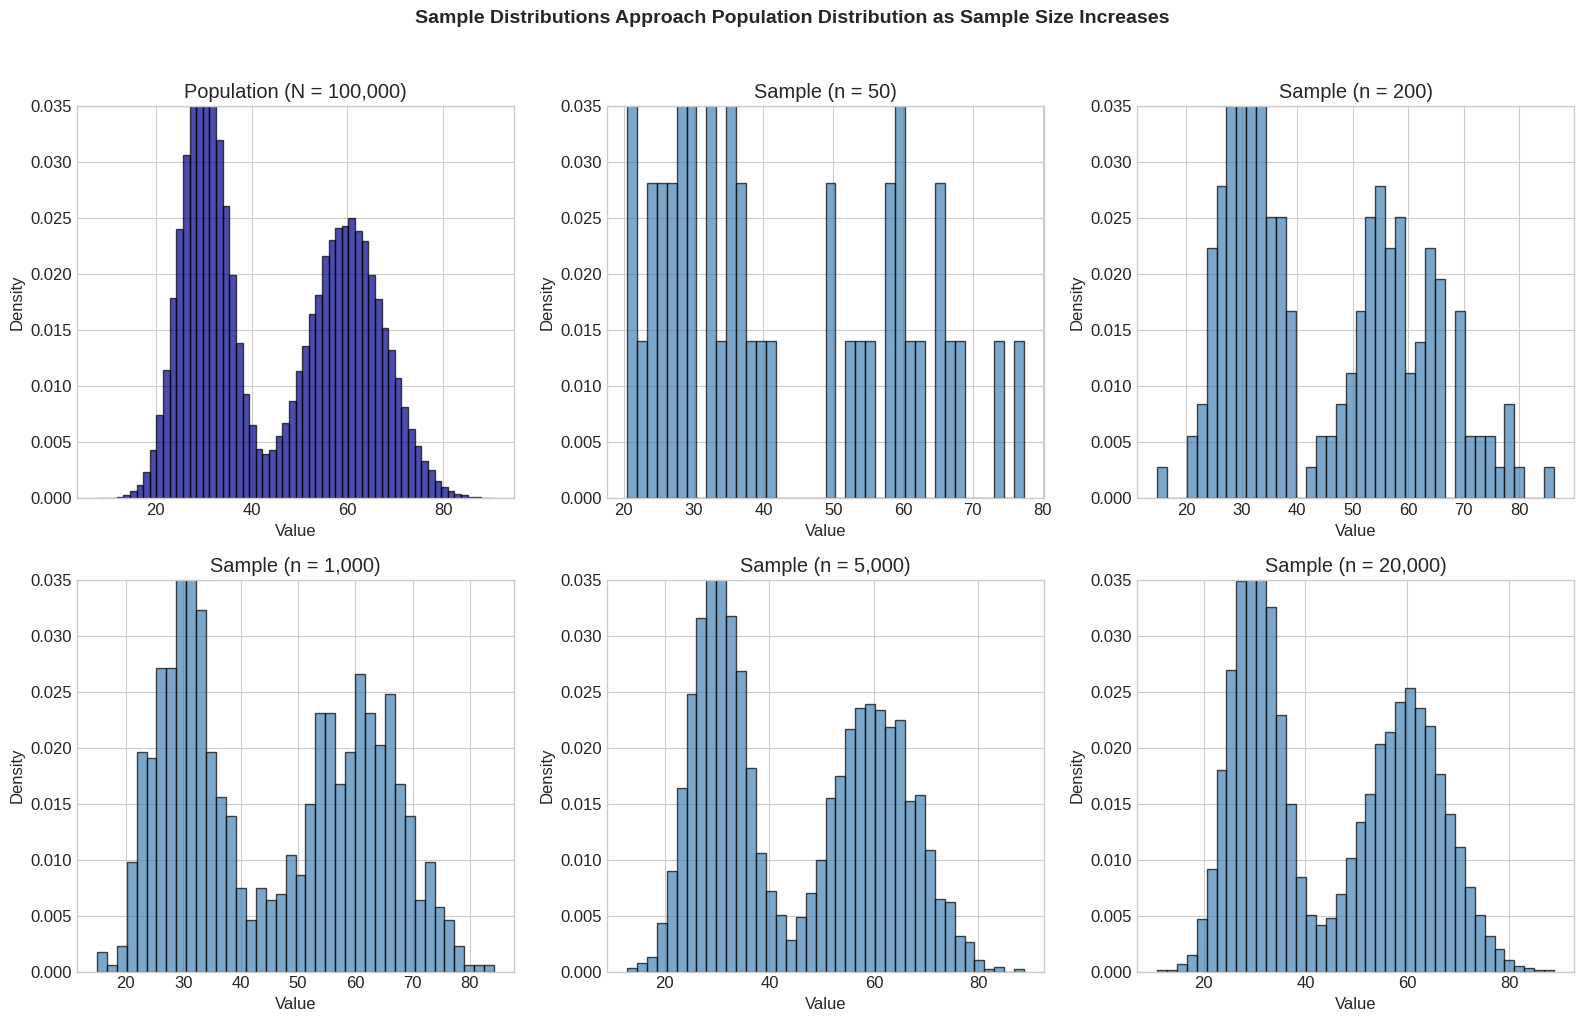

In [ ]:
# Draw samples of increasing size
sample_sizes = [50, 200, 1000, 5000, 20000]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# First plot: Population distribution (reference)
axes[0].hist(population, bins=60, density=True, color='darkblue',
             edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title(f'Population (N = {len(population):,})')
axes[0].set_ylim(0, 0.035)

# Sample distributions
for ax, n in zip(axes[1:], sample_sizes):
    sample = np.random.choice(population, size=n, replace=False)
    ax.hist(sample, bins=40, density=True, color='steelblue',
            edgecolor='black', alpha=0.7)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Sample (n = {n:,})')
    ax.set_ylim(0, 0.035)

plt.suptitle('Sample Distributions Approach Population Distribution as Sample Size Increases',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

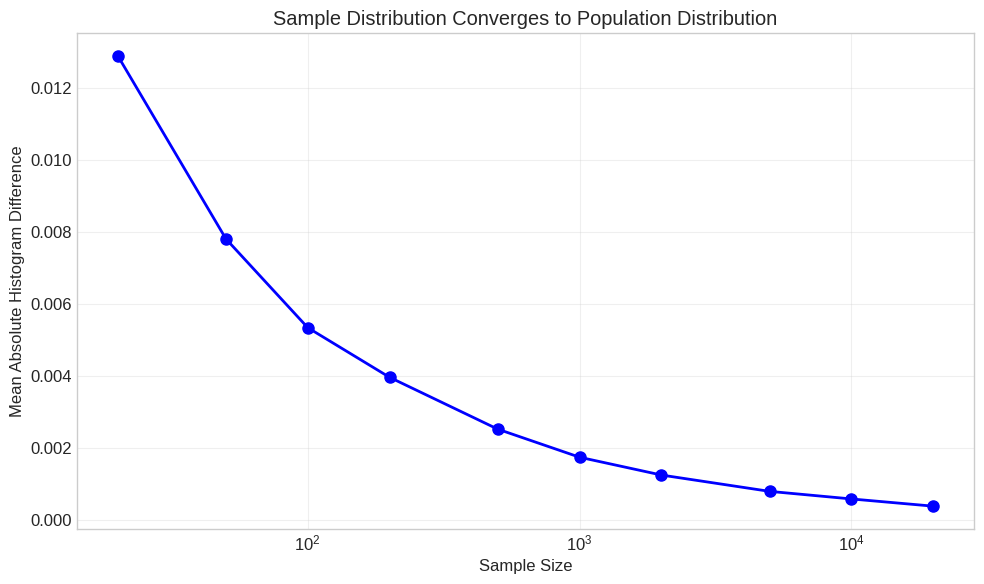


As sample size increases, the histogram difference decreases,
confirming that sample distribution approaches population distribution.


In [ ]:
# Let's quantify how sample distribution approaches population distribution
# Using histogram bin comparison

def histogram_similarity(population, sample, bins=50):
    """Compute similarity between population and sample histograms"""
    range_min, range_max = population.min(), population.max()

    pop_hist, bin_edges = np.histogram(population, bins=bins, range=(range_min, range_max), density=True)
    sample_hist, _ = np.histogram(sample, bins=bins, range=(range_min, range_max), density=True)

    # Mean absolute difference between histograms
    return np.mean(np.abs(pop_hist - sample_hist))

sample_sizes_extended = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
differences = []

for n in sample_sizes_extended:
    diffs = []
    for _ in range(10):  # Average over 10 samples
        sample = np.random.choice(population, size=n, replace=True)
        diffs.append(histogram_similarity(population, sample))
    differences.append(np.mean(diffs))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_extended, differences, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Sample Size')
plt.ylabel('Mean Absolute Histogram Difference')
plt.title('Sample Distribution Converges to Population Distribution')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAs sample size increases, the histogram difference decreases,")
print("confirming that sample distribution approaches population distribution.")

In [ ]:
# Create a population
np.random.seed(42)
population_lln = np.random.exponential(scale=5, size=100000)  # Mean = 5
true_mean = np.mean(population_lln)

print(f"Population: Exponential distribution with scale=5")
print(f"True population mean (μ): {true_mean:.4f}")

Population: Exponential distribution with scale=5
True population mean (μ): 4.9799


In [ ]:
# LLN Demonstration: Sample means for increasing sample sizes
sample_sizes_lln = np.arange(1, 5001, 10)

# Run multiple trials
n_trials = 5
all_means = []

for trial in range(n_trials):
    np.random.seed(trial * 100)
    running_means = []
    for n in sample_sizes_lln:
        sample = np.random.choice(population_lln, size=n, replace=True)
        running_means.append(np.mean(sample))
    all_means.append(running_means)

all_means = np.array(all_means)

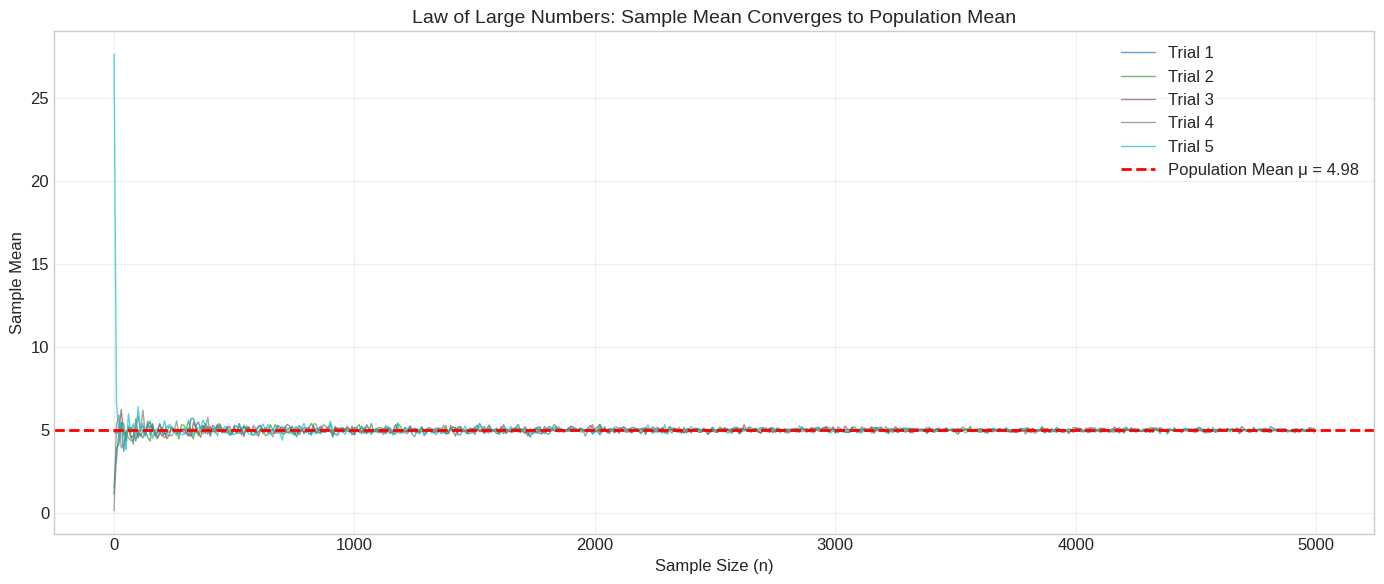


Observation: As sample size increases, all sample means converge to the population mean.
At n=5000, the sample means deviate from μ by at most 0.1853


In [ ]:
# Plot LLN demonstration
plt.figure(figsize=(14, 6))

colors = plt.cm.tab10(np.linspace(0, 1, n_trials))
for i in range(n_trials):
    plt.plot(sample_sizes_lln, all_means[i], alpha=0.7, color=colors[i],
             label=f'Trial {i+1}', linewidth=1)

plt.axhline(true_mean, color='red', linestyle='--', linewidth=2,
            label=f'Population Mean μ = {true_mean:.2f}')

plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Sample Mean', fontsize=12)
plt.title('Law of Large Numbers: Sample Mean Converges to Population Mean', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nObservation: As sample size increases, all sample means converge to the population mean.")
print(f"At n=5000, the sample means deviate from μ by at most {np.max(np.abs(all_means[:, -1] - true_mean)):.4f}")

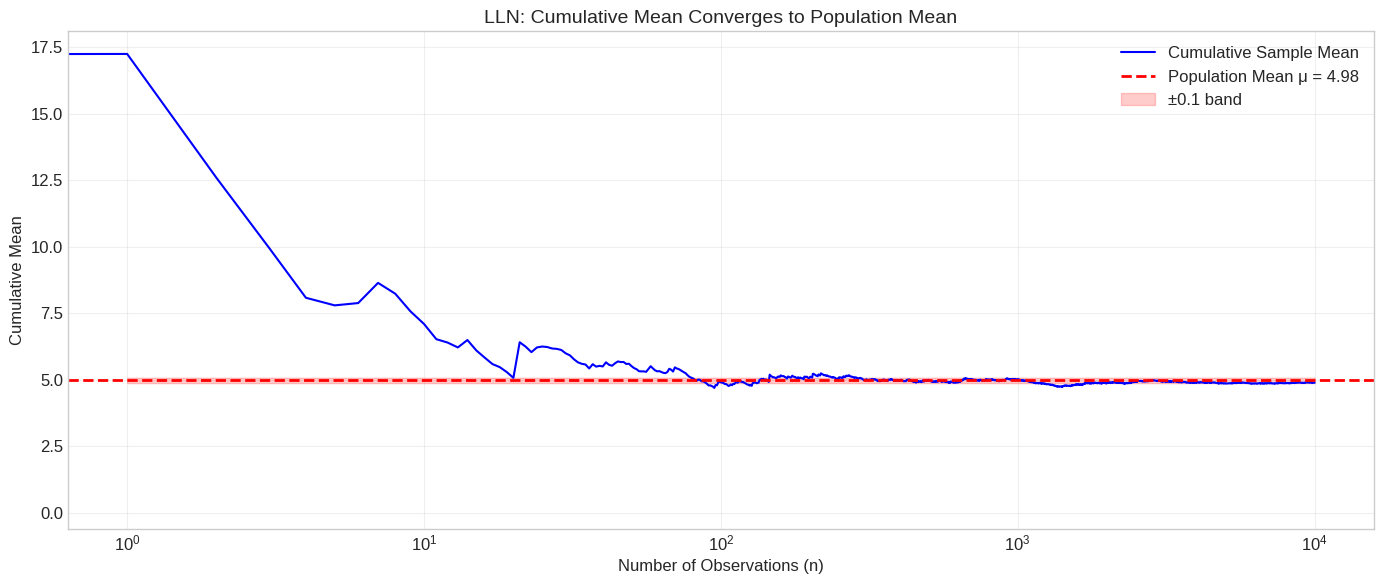

In [ ]:
# Show convergence more clearly with cumulative mean
np.random.seed(123)
large_sample = np.random.choice(population_lln, size=10000, replace=True)

cumulative_means = np.cumsum(large_sample) / np.arange(1, len(large_sample) + 1)

plt.figure(figsize=(14, 6))
plt.plot(cumulative_means, 'b-', linewidth=1.5, label='Cumulative Sample Mean')
plt.axhline(true_mean, color='red', linestyle='--', linewidth=2,
            label=f'Population Mean μ = {true_mean:.2f}')

# Add confidence band
plt.fill_between(range(1, len(cumulative_means)+1),
                 true_mean - 0.1, true_mean + 0.1,
                 alpha=0.2, color='red', label='±0.1 band')

plt.xlabel('Number of Observations (n)', fontsize=12)
plt.ylabel('Cumulative Mean', fontsize=12)
plt.title('LLN: Cumulative Mean Converges to Population Mean', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()

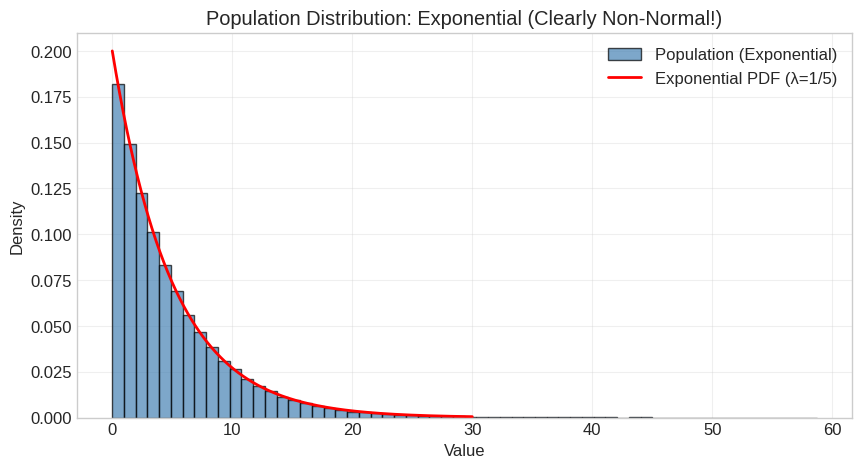

Notice: The population is highly right-skewed (exponential distribution)
CLT tells us the distribution of SAMPLE MEANS will still be approximately normal!


In [ ]:
# CLT Demonstration: Use exponential distribution (clearly non-normal)
np.random.seed(42)

# Population parameters
scale = 5  # Mean = scale for exponential
pop_mean = scale
pop_std = scale  # std = mean for exponential

# Show population distribution
plt.figure(figsize=(10, 5))
x = np.linspace(0, 30, 1000)
plt.hist(population_lln, bins=60, density=True, alpha=0.7, color='steelblue',
         edgecolor='black', label='Population (Exponential)')
pdf = stats.expon.pdf(x, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label=f'Exponential PDF (λ=1/{scale})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Population Distribution: Exponential (Clearly Non-Normal!)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Notice: The population is highly right-skewed (exponential distribution)")
print("CLT tells us the distribution of SAMPLE MEANS will still be approximately normal!")

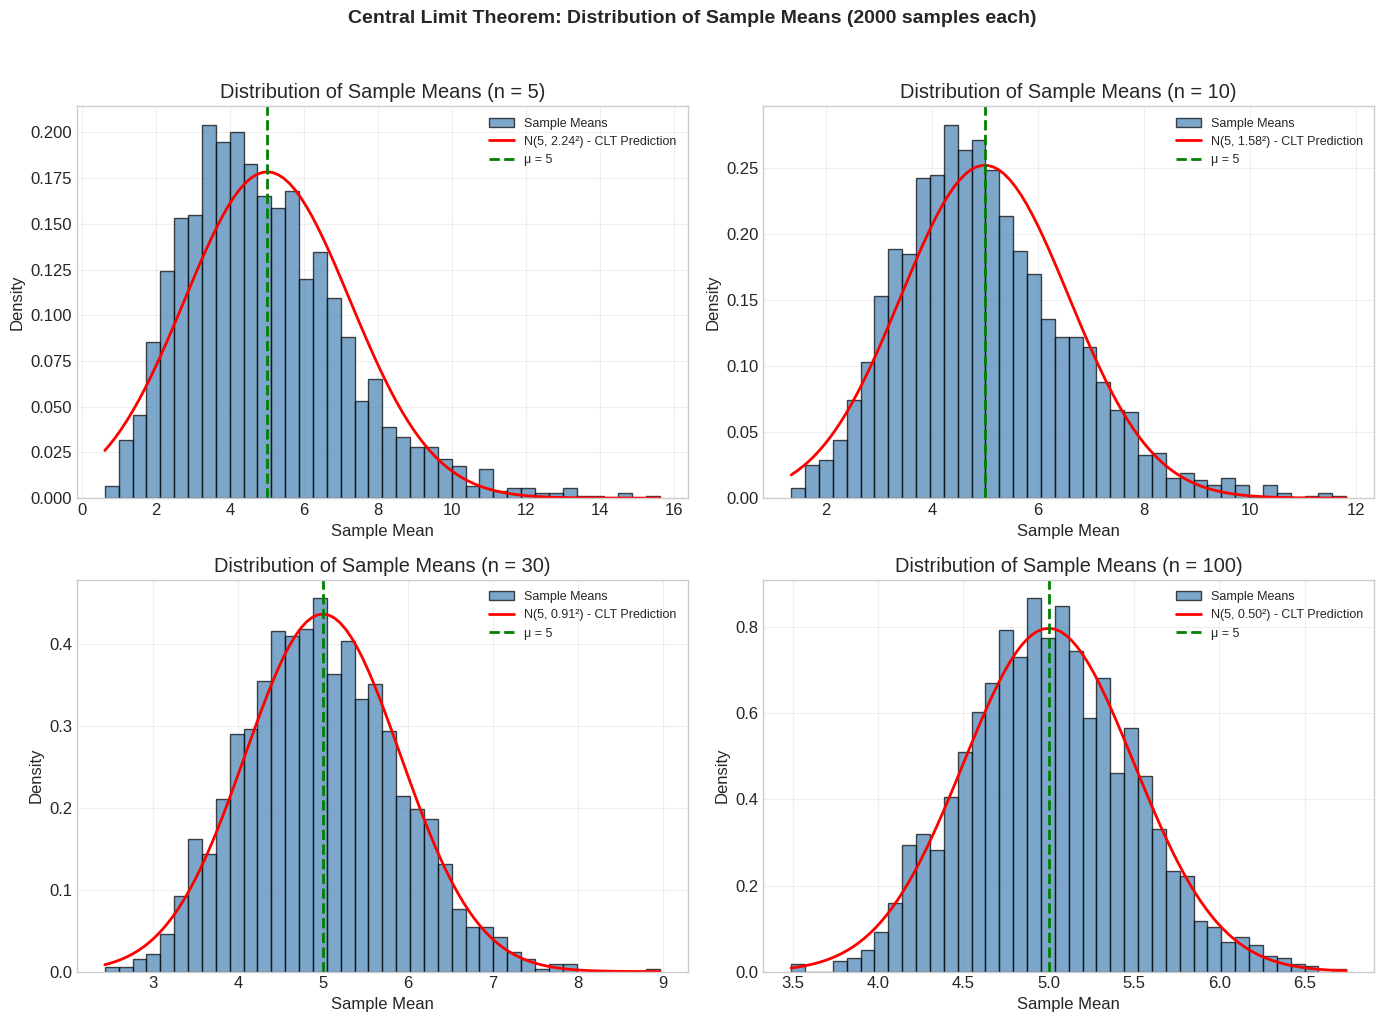

In [ ]:
# Draw multiple samples and compute their means
n_samples = 2000  # Number of samples to draw
sample_sizes_clt = [5, 10, 30, 100]  # Different sample sizes to try

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n in zip(axes, sample_sizes_clt):
    # Draw n_samples samples of size n and compute their means
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population_lln, size=n, replace=True)
        sample_means.append(np.mean(sample))
    sample_means = np.array(sample_means)

    # Plot histogram of sample means
    ax.hist(sample_means, bins=40, density=True, alpha=0.7, color='steelblue',
            edgecolor='black', label='Sample Means')

    # Overlay theoretical normal distribution (predicted by CLT)
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    theoretical_std = pop_std / np.sqrt(n)
    normal_pdf = stats.norm.pdf(x, loc=pop_mean, scale=theoretical_std)
    ax.plot(x, normal_pdf, 'r-', linewidth=2,
            label=f'N({pop_mean}, {theoretical_std:.2f}²) - CLT Prediction')

    ax.axvline(pop_mean, color='green', linestyle='--', linewidth=2,
               label=f'μ = {pop_mean}')

    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of Sample Means (n = {n})')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle(f'Central Limit Theorem: Distribution of Sample Means ({n_samples} samples each)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


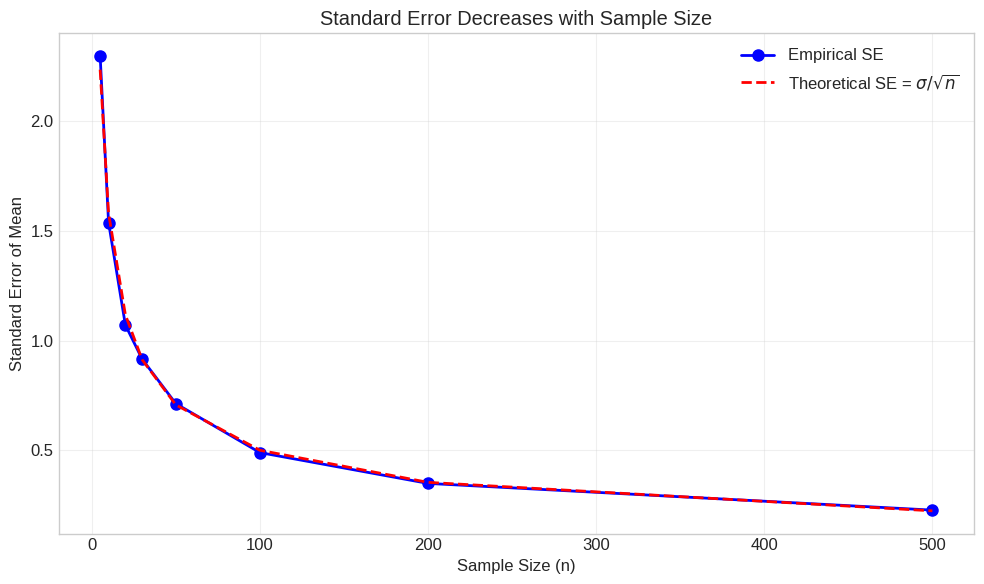

In [ ]:
# Verification: Standard error decreases with sample size
sample_sizes_se = [5, 10, 20, 30, 50, 100, 200, 500]
empirical_se = []
theoretical_se = []

for n in sample_sizes_se:
    # Draw many samples and compute their means
    sample_means = [np.mean(np.random.choice(population_lln, size=n, replace=True))
                    for _ in range(1000)]
    empirical_se.append(np.std(sample_means))
    theoretical_se.append(pop_std / np.sqrt(n))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_se, empirical_se, 'bo-', linewidth=2, markersize=8, label='Empirical SE')
plt.plot(sample_sizes_se, theoretical_se, 'r--', linewidth=2, label=r'Theoretical SE = $\sigma/\sqrt{n}$')
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error of Mean')
plt.title('Standard Error Decreases with Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()